# CNN Sınıflandırma – Model 2 (Temel CNN)

Ad: Yusuf

Soyad: TUNÇ

Okul No: 2012721024

GitHub Repo Bağlantısı: https://github.com/ytunc4141/CNN_siniflandirma


Bu modelde, CIFAR-10 örneğindeki gibi sıfırdan tanımlanmış basit bir CNN mimarisi kullanılarak görüntü sınıflandırma işlemi gerçekleştirilmiştir.  
Model, transfer learning kullanılmadan, yalnızca oluşturulan CNN katmanları ile eğitilmiştir.


## Gerekli Kütüphanelerin Yüklenmesi

Bu bölümde modelin kurulması, eğitilmesi ve değerlendirilmesi için gerekli olan `TensorFlow`, `Keras`, `NumPy` ve `Matplotlib` kütüphaneleri içe aktarılmıştır.


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

## Google Drive Bağlantısı

Veri seti ve model çıktıları Google Drive üzerinde tutulduğu için Drive bağlantısı yapılmıştır.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Veri Seti ve Model Parametreleri

Bu bölümde veri setinin bulunduğu klasör yolu tanımlanmış, görüntü boyutu, batch size ve epoch sayısı gibi temel eğitim parametreleri belirlenmiştir.


In [3]:
DATASET_PATH = "/content/drive/MyDrive/Colab_Notebooks/CNN_Siniflandirma/dataset"

In [4]:
IMG_SIZE = (64, 64)
BATCH_SIZE = 32
EPOCHS = 20

### Veri Ön İşleme (ImageDataGenerator) ve Eğitim ve Doğrulama Verilerinin Oluşturulması

Bu hücrede görüntüler modele verilmeden önce normalize edilmiştir.
Ayrıca `validation_split` parametresi kullanılarak veri seti
eğitim (%80) ve doğrulama (%20) olarak ikiye ayrılmıştır.

Bu bölümde eğitim ve doğrulama verileri,
`ImageDataGenerator` ve `flow_from_directory` fonksiyonları kullanılarak
diskten okunmuş ve modele uygun hale getirilmiştir.


In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 119 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


### Temel CNN Modeli

Bu hücrede sıfırdan bir CNN mimarisi oluşturulmuştur.  
Model, görüntülerden özellik çıkarmak için `Convolution` ve `MaxPooling` katmanlarını kullanır.  
Çıkışta ise `Dense` katmanlar ile sınıflandırma yapılmaktadır.


In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Modelin Derlenmesi

Model, `categorical_crossentropy` kayıp fonksiyonu ve `Adam` optimizasyon algoritması kullanılarak derlenmiştir.
Performans metriği olarak doğruluk `(accuracy)` seçilmiştir.


In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,458 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

## Modelin Eğitilmesi

Bu hücrede model, eğitim verileri üzerinde eğitilmiş ve doğrulama verileri ile performansı takip edilmiştir.


In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 6s/step - accuracy: 0.5709 - loss: 0.5962 - val_accuracy: 1.0000 - val_loss: 0.1700
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.9704 - loss: 0.1885 - val_accuracy: 1.0000 - val_loss: 0.0062
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 1.0000 - val_loss: 4.3578e-04
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 1.5819e-04
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 1.0644e-06
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 1.0000 - loss: 1.7491e-05 - val_accuracy: 1.0000 - val_loss: 6.3862e-08
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 1.0000 - loss: 2.8032e-05 - val_accuracy: 1.0000 - val_loss: 1.3624e-07
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 1.0000 - loss: 6.6521e-05 - va

### Eğitim ve Doğrulama Doğruluk / Kayıp Grafikleri

Bu bölümde modelin eğitim süreci boyunca elde ettiği
eğitim ve doğrulama doğruluk `(accuracy)` ile kayıp `(loss)`
değerleri görselleştirilmiştir.

Grafikler sayesinde:
- Modelin öğrenme süreci,
- Aşırı öğrenme `(overfitting)` olup olmadığı,
- Eğitim ve doğrulama performansları arasındaki fark

incelenebilmektedir.


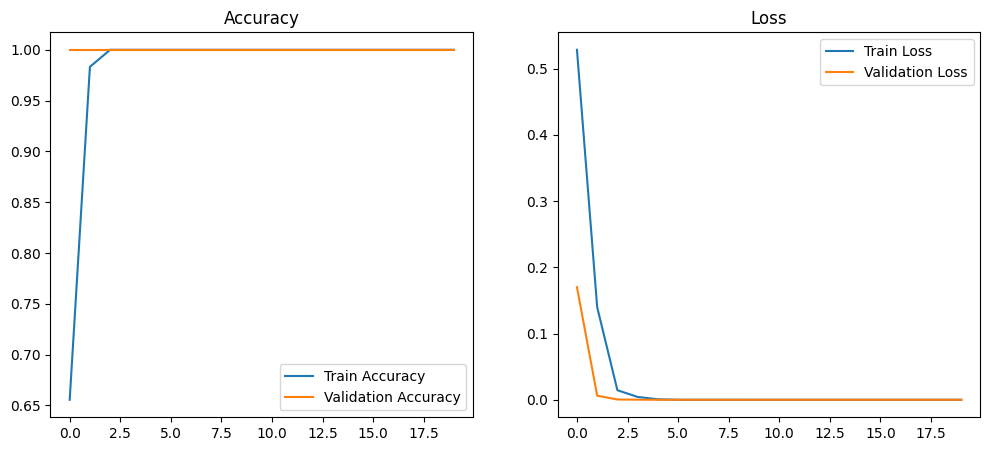

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()

### Modelin Doğrulama Verisi Üzerinde Değerlendirilmesi

Bu hücrede eğitilmiş model, doğrulama `(validation)` verisi üzerinde değerlendirilmiştir.  
Modelin doğruluk `(accuracy)` değeri hesaplanarak performansı ölçülmüştür.


In [10]:
test_loss, test_acc = model.evaluate(val_generator)
print(f"Test Accuracy: %{test_acc*100:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: %100.00


## Tek Görüntü Üzerinde Tahmin

Bu bölümde eğitilmiş model kullanılarak tek bir trafik levhası görüntüsü üzerinde sınıf tahmini yapılmıştır.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


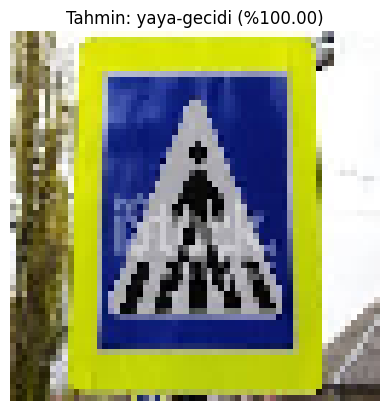

In [19]:
class_labels = {v: k for k, v in train_generator.class_indices.items()}

img_path = "/content/drive/MyDrive/Colab_Notebooks/CNN_Siniflandirma/test/5.jpg"

img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_index = np.argmax(prediction)
predicted_class = class_labels[class_index]
confidence = np.max(prediction) * 100

plt.imshow(img)
plt.axis("off")
plt.title(f"Tahmin: {predicted_class} (%{confidence:.2f})")
plt.show()